#  Computational Philosophy and History of Science
## Analysing scientific publications: the case of Remdesivir research
## Gerd Graßhoff

# Libraries, data

In [1]:
import pandas as pd
import spacy
from spacy import displacy
from spacy.matcher import Matcher,PhraseMatcher
from spacy.tokens import Doc, Span, Token
from collections import Counter

In [2]:
import statementdependency
from statementdependency import StatementGraph,dotCausG

In [3]:
import warnings
warnings.filterwarnings('ignore')

# NLP processing libraries

In [4]:
# Import library
nlp = spacy.load('en_core_web_lg')

In [5]:
matcher = Matcher(nlp.vocab)

# Data preparation, research objects

In [6]:
def splitsent(x):
    l=[sent for sent in x.sents]
    return(l)

In [7]:
dfRem=pd.read_json("dfRemdesivierResearchObjects.json")[["title","abstract"]]
dfRem=dfRem.dropna(subset=["abstract"])
dfRem["doc"]=dfRem["abstract"].apply(nlp)
dfRem["sentences"]=dfRem["doc"].apply(splitsent)
len(dfRem)

2135

In [8]:
dfRem.head(2)

,title,abstract,doc,sentences
0,Evaluation of the efficacy and safety of intra...,BACKGROUND: Coronavirus disease 2019 (COVID-19...,"(BACKGROUND, :, Coronavirus, disease, 2019, (,...","[(BACKGROUND, :), (Coronavirus, disease, 2019,..."
1,Role of adjunctive treatment strategies in COV...,The coronavirus disease (COVID-19) pandemic ha...,"(The, coronavirus, disease, (, COVID-19, ), pa...","[(The, coronavirus, disease, (, COVID-19, ), p..."


In [9]:
exemplar=dfRem["sentences"].iloc[2]

In [10]:
for i,sent in enumerate(exemplar):
    print(f" Satz {i}= {sent}")

 Satz 0= Middle East respiratory syndrome coronavirus (MERS-CoV) is the causative agent of a severe respiratory disease associated with more than 2468 human infections and over 851 deaths in 27 countries since 2012.
 Satz 1= There are no approved treatments for MERS-CoV infection although a combination of lopinavir, ritonavir and interferon beta (LPV/RTV-IFNb) is currently being evaluated in humans in the Kingdom of Saudi Arabia.
 Satz 2= Here, we show that remdesivir (RDV) and IFNb have superior antiviral activity to LPV and RTV in vitro.
 Satz 3= In mice, both prophylactic and therapeutic RDV improve pulmonary function and reduce lung viral loads and severe lung pathology.
 Satz 4= In contrast, prophylactic LPV/RTV-IFNb slightly reduces viral loads without impacting other disease parameters.
 Satz 5= Therapeutic LPV/RTV-IFNb improves pulmonary function but does not reduce virus replication or severe lung pathology.
 Satz 6= Thus, we provide in vivo evidence of the potential for RDV t

# argument structure

// Rule based links visualization
digraph {
	graph [fontsize=20 label="Argument visualizer" labelloc=t rankdir=LR]
	node [shape=box]
	size=10
	0 [label=0]
	0 -> 6 [samehead=1]
	1 [label=1]
	1 -> 6 [samehead=1]
	2 [label=2]
	2 -> 6
	3 [label=3]
	3 -> 2
	4 [label=-4]
	4 -> 2 [samehead=2]
	5 [label=-5]
	5 -> 2 [samehead=2]
}


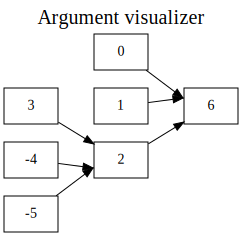

In [11]:
argument={6: [[0, 1], [2]], 2: [[3],[-4,-5]]}
argdict={
        0:"MERS-CoV is causative agent of severe respiratory disease",
        1:"no approved treatments for MERS-CoV infection, LPV/RTV-IFNb candidate",
        2:"remdesivir (RDV) and IFNb have superior antiviral activity to LPV and RTV in vitro",
        3:"RDV improve pulmonary function",
        4:"LPV/RTV-IFNb slightly reduces viral loads",
        5:"Therapeutic LPV/RTV-IFNb improves pulmonary function not reduce virus replication",
        6:"RDV to treat MERS-CoV infections"}
causG = StatementGraph("Argument1", argument)
d = dotCausG(causG,argdict=argdict)
print(d)
d

# statement decomposition

In [12]:
displacy.render(exemplar[6], style="ent")
displacy.render(exemplar[6], style="dep")

In [13]:
pattern = [{"LOWER":"we"},{'POS': 'VERB'}]
matcher.add("matching",None,pattern)

In [14]:
def searchacts(a):
    matches=matcher(a)
    for _,start,end in matches:
        verb=a[end-1]
        actionverbs.append(verb.lemma_)

In [15]:
for i,sent in enumerate(exemplar):
    actionverbs=[]
    searchacts(sent)
    print(f" Satz {i}= {sent} ::::: {actionverbs}")

 Satz 0= Middle East respiratory syndrome coronavirus (MERS-CoV) is the causative agent of a severe respiratory disease associated with more than 2468 human infections and over 851 deaths in 27 countries since 2012. ::::: []
 Satz 1= There are no approved treatments for MERS-CoV infection although a combination of lopinavir, ritonavir and interferon beta (LPV/RTV-IFNb) is currently being evaluated in humans in the Kingdom of Saudi Arabia. ::::: []
 Satz 2= Here, we show that remdesivir (RDV) and IFNb have superior antiviral activity to LPV and RTV in vitro. ::::: ['show']
 Satz 3= In mice, both prophylactic and therapeutic RDV improve pulmonary function and reduce lung viral loads and severe lung pathology. ::::: []
 Satz 4= In contrast, prophylactic LPV/RTV-IFNb slightly reduces viral loads without impacting other disease parameters. ::::: []
 Satz 5= Therapeutic LPV/RTV-IFNb improves pulmonary function but does not reduce virus replication or severe lung pathology. ::::: []
 Satz 6= 

In [16]:
actionverbs=[]
dfRem["doc"].apply(searchacts)
len(actionverbs)

1482

In [17]:
counts=Counter(actionverbs)
print(sorted(counts))

['abstract', 'adapt', 'address', 'administer', 'administrate', 'advance', 'advise', 'advocate', 'aim', 'allow', 'analyse', 'analyze', 'anticipate', 'apply', 'appreciate', 'approach', 'argue', 'ask', 'assay', 'assess', 'assume', 'await', 'base', 'believe', 'build', 'calculate', 'call', 'can', 'carry', 'challenge', 'characterise', 'characterize', 'choose', 'clone', 'co', 'collect', 'combine', 'come', 'comment', 'compare', 'conclude', 'conduct', 'confirm', 'consider', 'construct', 'contend', 'could', 'create', 'decide', 'declare', 'define', 'demonstrate', 'denote', 'deploy', 'describe', 'design', 'detail', 'detect', 'determine', 'develop', 'disagree', 'discover', 'discuss', 'divide', 'dock', 'download', 'draw', 'ease', 'elucidate', 'emphasize', 'employ', 'encourage', 'engineer', 'enrol', 'enter', 'establish', 'estimate', 'evaluate', 'evidence', 'examine', 'exclude', 'expect', 'explain', 'explore', 'express', 'extend', 'extract', 'find', 'focus', 'follow', 'form', 'found10', 'frame', 'gene

# Propositional research attitudes

- GOAL (intention, goal):  
    - aim, seek, study, undertake, investigate, intend
- DISCOV: 
    - show, propose, obtain, report, observe, create, demonstrate, detect, scrutinize, provide

## verb classes

In [18]:
verbtags={"GOAL":
       ["aim","seek","study","undertake","investigate","intend"],
       "DISCOV":
        ["show","provide","notice","report","detect"],
       "CAUSV":
        ["treat"]
         }
verbtags.keys()

dict_keys(['GOAL', 'DISCOV', 'CAUSV'])

In [22]:
class DiscReport(object):
    """ pipeline component that sets entity annotations
    based on list of single or multiple-word. Discovery Verbs are
    labelled as DISC and their spans are merged into one token. Additionally,
    ._.has_disc_verb and ._.is_disc_verb is set on the Doc/Span and Token
    respectively."""

    #name = label+"_verb"  # component name, will show up in the pipeline

    def __init__(self, nlp, discv=tuple()):
        """Initialise the pipeline component. The shared nlp instance is used
        to initialise the matcher with the shared vocab, get the label ID and
        generate Doc objects as phrase match patterns.
        """
        label="DISC"
        self.label = nlp.vocab.strings[label]  # get entity label ID

        # Set up the PhraseMatcher – it can now take Doc objects as patterns,
        # so even if the list of companies is long, it's very efficient
        patterns = [nlp(v) for v in discv]
        self.matcher = PhraseMatcher(nlp.vocab)
        self.matcher.add(label+"_VERB", None, *patterns)

        # Register attribute on the Token. We'll be overwriting this based on
        # the matches, so we're only setting a default value, not a getter.
        Token.set_extension("is_"+label+"disc_verb", force=True,default=False)

        # Register attributes on Doc and Span via a getter that checks if one of
        # the contained tokens is set to is_disc_verb == True.
        Doc.set_extension("has_"+label+"disc_verb", force=True,getter=self.has_disc_verb)
        Span.set_extension("has_"+label+"disc_verb", force=True,getter=self.has_disc_verb)

    def __call__(self, doc,label):
        """Apply the pipeline component on a Doc object and modify it if matches
        are found. Return the Doc, so it can be processed by the next component
        in the pipeline, if available.
        """
        matches = self.matcher(doc)
        spans = []  # keep the spans for later so we can merge them afterwards
        for _, start, end in matches:
            # Generate Span representing the entity & set label
            entity = Span(doc, start, end, label=self.label)
            spans.append(entity)
            # Set custom attribute on each token of the entity
            for token in entity:
                token._.set("is_"+"disc_verb", True)
            # Overwrite doc.ents and add entity – be careful not to replace!
            doc.ents = list(doc.ents) + [entity]
        for span in spans:
            # Iterate over all spans and merge them into one token. This is done
            # after setting the entities – otherwise, it would cause mismatched
            # indices!
            span.merge()
        return doc  # don't forget to return the Doc!

    def has_disc_verb(self, tokens):
        """Getter for Doc and Span attributes. Returns True if one of the tokens
        is a tech org. Since the getter is only called when we access the
        attribute, we can refer to the Token's 'is_tech_org' attribute here,
        which is already set in the processing step."""
        return any([t._.get("is_"+"disc_verb") for t in tokens])

In [24]:
label="DISCOV"
discv=verbtags[label]
nlp.vocab.strings.add(label)
print(discv)
comp=DiscReport(nlp)
#nlp.add_pipe(comp,last=True)

['show', 'provide', 'notice', 'report', 'detect']


In [21]:
doc = nlp(exemplar[6].text)

TypeError: __call__() missing 1 required positional argument: 'label'

In [ ]:
print("Pipeline", nlp.pipe_names)  # pipeline contains component name
print("Tokens", [t.text for t in doc])  # company names from the list are merged
print("Doc has_disc_verb", doc._.has_disc_verb)  # Doc contains tech orgs
print("Token 0 disc_verb", doc[0]._.is_disc_verb)  # "Alphabet Inc." is a tech org
print("Token 3 disc_verb", doc[3]._.is_disc_verb)  # "is" is not
print("Entities", [(e.text, e.label_) for e in doc.ents])  # all orgs are entities

In [ ]:
displacy.render(doc, style="ent")

# Action verbs

In [ ]:
def actionverb(abstract):
    matches=matcher(abstract)
    listDisc=[]
    for _,start,end in matches:
        verb=abstract[end-1].text
        verblem=abstract[end-1].lemma_
        for ent,verbs in verbtags.items():
            if verblem in verbs:
                dict_disc=(start+1,end,ent)
                listDisc.append(dict_disc)
    return(listDisc)

In [ ]:
dfRem["discNER"]=dfRem["doc"].apply(actionverb)  

In [ ]:
dfRem.head(19)

# Pattern elements

In [ ]:
for sent in exemplar:
    print(f"*****\nfor {sent}")
    chunks=list(sent.noun_chunks)
    print("noun chunks:",chunks)

## Factors


In [ ]:
import textacy
import textacy.resources
#rs.download()
import textacy.ke
rs = textacy.resources.ConceptNet()

In [ ]:
s=exemplar[6]

In [ ]:
list(textacy.extract.entities(s))

In [ ]:
list(textacy.extract.noun_chunks(s))

In [ ]:
l=list(textacy.extract.subject_verb_object_triples(s))
l

In [ ]:
_,v,_=l[0]
v

In [ ]:
list(v.subtree)

In [ ]:
list(v.lefts)

## similarity 

In [ ]:
def similar_nchunks(doc,keyterm,cumlist,threshhold=0.5):
    key=nlp(keyterm)
    chunks=list(doc.noun_chunks)
    for noun in chunks:
        simval=noun.similarity(key)
        if simval>threshhold:
            cumlist.append((noun,simval))
    return(cumlist)

# Causal reconstruction

## Causes, relevant causal factors

In [ ]:
cumlist=[]
dfRem["doc"].apply(lambda x:similar_nchunks(x,"agent",cumlist))
cumlist

In [ ]:
cumlist=[]
dfRem["doc"].apply(lambda x:similar_nchunks(x,"evidence",cumlist,threshhold=0.7))
len(cumlist)

# Thank you